<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/collection-of-models/LaptopPricePredictionModelPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [ ]:
# importing our dataset
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/laptop_ph_prices_updated.csv')
df.head()

,Brand,CPU_name,RAM,Prices
0,Lenovo,Intel Celeron,4GB,19995
1,Lenovo,Intel Celeron,4GB,20999
2,HP,Intel Celeron,4GB,21990
3,Asus,Intel Celeron,4GB,21995
4,Acer,Intel Celeron,4GB,21995


In [ ]:
df.info

<bound method DataFrame.info of       Brand       CPU_name   RAM  Prices
0    Lenovo  Intel Celeron   4GB   19995
1    Lenovo  Intel Celeron   4GB   20999
2        HP  Intel Celeron   4GB   21990
3      Asus  Intel Celeron   4GB   21995
4      Acer  Intel Celeron   4GB   21995
..      ...            ...   ...     ...
230      HP  Intel Core i7  16GB   95990
231      HP  Intel Core i7  16GB   99990
232    Asus  Intel Core i7  16GB   99995
233      HP  Intel Core i7  16GB  102990
234      HP  Intel Core i7  16GB  102990

[235 rows x 4 columns]>

In [ ]:
df.isnull().sum()

Brand       0
CPU_name    0
RAM         0
Prices      0
dtype: int64

In [ ]:
df.sample(5)

,Brand,CPU_name,RAM,Prices
109,Acer,Intel Core i5,8GB,39999
196,HP,Intel Core i5,8GB,59999
167,HP,Intel Core i5,4GB,52990
191,HP,AMD Ryzen 7,16GB,59990
39,Acer,Intel Core i3,8GB,30500


In [ ]:
df['Brand'].unique()

array(['Lenovo', 'HP', 'Asus', 'Acer', 'Huawei', 'MSI', 'Dell'],
      dtype=object)

In [ ]:
df['CPU_name'].unique()

array(['Intel Celeron', 'Intel Pentium', 'Intel Core i3', 'AMD Ryzen 3',
       'Others', 'Intel Core i5', 'AMD Ryzen 5', 'AMD Ryzen 7',
       'Intel Core i7'], dtype=object)

In [ ]:
df['RAM'].unique()

array(['4GB', '8GB', 'Others', '16GB'], dtype=object)

In [ ]:
# Replacing values from the Brand column 
df.replace({'Brand': {'Lenovo':0, 'HP':1, 'Asus':2, 'Acer':3, 'Huawei':4, 'MSI':5, 'Dell':6}}, inplace=True)

# Replacing values from the CPU_name column 
df.replace({'CPU_name': {'Intel Celeron':0, 'Intel Pentium':1, 'Intel Core i3':2, 'AMD Ryzen 3':3, 'Others':4, 'Intel Core i5':5, 'AMD Ryzen 5':6, 'AMD Ryzen 7':7, 'Intel Core i7':8}}, inplace=True)

# Replacing values from the RAM column 
df.replace({'RAM': {'4GB':0, '8GB':1, 'Others':2, '16GB':3}}, inplace=True)

df.head()
 

,Brand,CPU_name,RAM,Prices
0,0,0,0,19995
1,0,0,0,20999
2,1,0,0,21990
3,2,0,0,21995
4,3,0,0,21995


In [ ]:
X = df[['Brand', 'CPU_name', 'RAM']]
Y = df[['Prices']]

In [ ]:
# Split our training and test data, random_state - to split the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [ ]:
# Let's now train our model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Evaluate our model, predicts the price values depending on other data given
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.6664202259210001


Text(0.5, 1.0, 'Actual Prices')

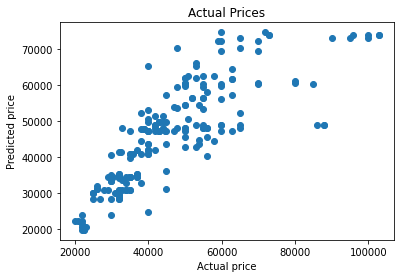

In [ ]:
# Visualize the actual prices and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices")

In [ ]:
# Evaluate our model, predicts the price values depending on other data given
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8218800861469082


Text(0.5, 1.0, 'Actual Prices')

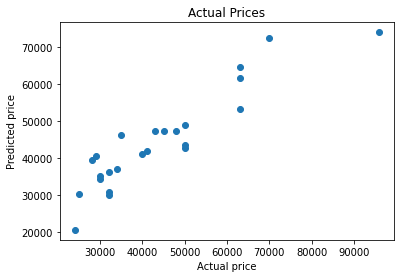

In [ ]:
 # Visualize the actual prices and predicted prices

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual Prices")


In [ ]:
input_data = (2,3,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lin_reg_model.predict(input_data_reshaped)
for x in prediction:
  print("Selling Price: ", int(x), "pesos")


Selling Price:  39462 pesos


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# import joblib

# joblib.dump(lin_reg_model, 'laptop_price_ph_model')

In [ ]:
# model = joblib.load('laptop_price_ph_model')
# laptopmodel = model.predict([[2,3,1]])
# print(laptopmodel[0])

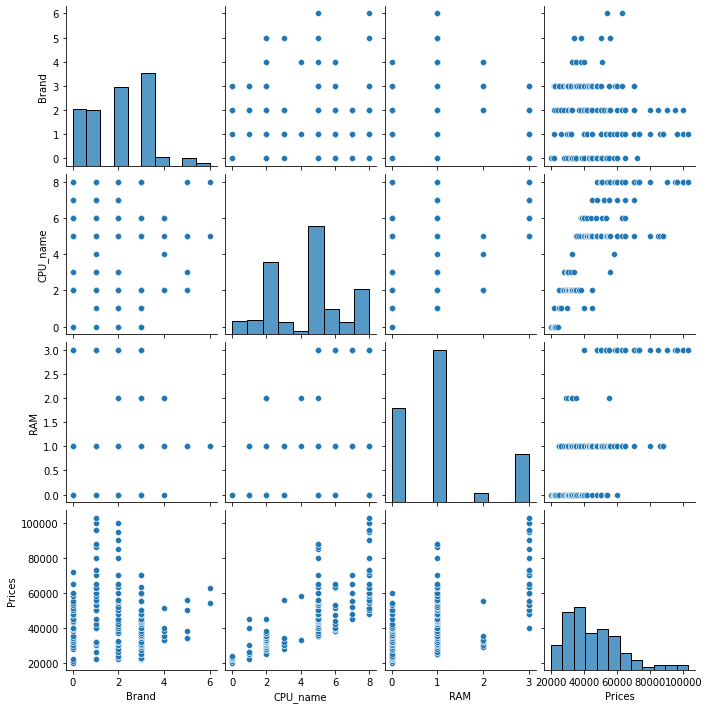

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Brand,CPU_name,RAM,Prices
Brand,1.000000,-0.110081,0.008732,-0.147921
CPU_name,-0.110081,1.000000,0.448567,0.762662
RAM,0.008732,0.448567,1.000000,0.616769
Prices,-0.147921,0.762662,0.616769,1.000000


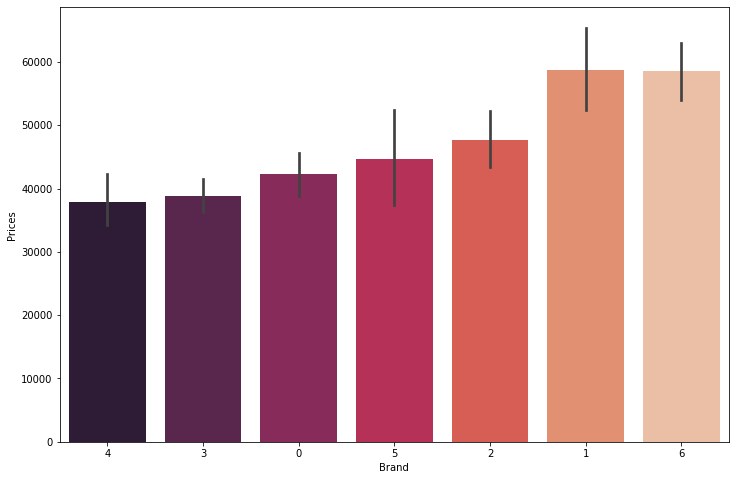

In [ ]:
plt.figure(figsize=(12,8))
result = df.groupby(["Brand"])['Prices'].median().reset_index().sort_values('Prices')
sns.barplot(x='Brand', y="Prices", data=df, palette='rocket', order=result['Brand'])

In [ ]:
# Replacing values from the Brand column 
df.replace({'Brand': {1:5, 2:4, 5:3, 0:2, 3:1, 4:0}}, inplace=True)
df.head()

,Brand,CPU_name,RAM,Prices
0,2,0,0,19995
1,2,0,0,20999
2,5,0,0,21990
3,4,0,0,21995
4,1,0,0,21995


In [ ]:
df.corr()

,Brand,CPU_name,RAM,Prices
Brand,1.000000,0.201634,0.126212,0.400136
CPU_name,0.201634,1.000000,0.448567,0.762662
RAM,0.126212,0.448567,1.000000,0.616769
Prices,0.400136,0.762662,0.616769,1.000000


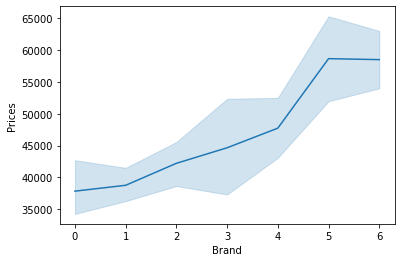

In [ ]:
sns.lineplot(x=df['Brand'], y=df['Prices'])

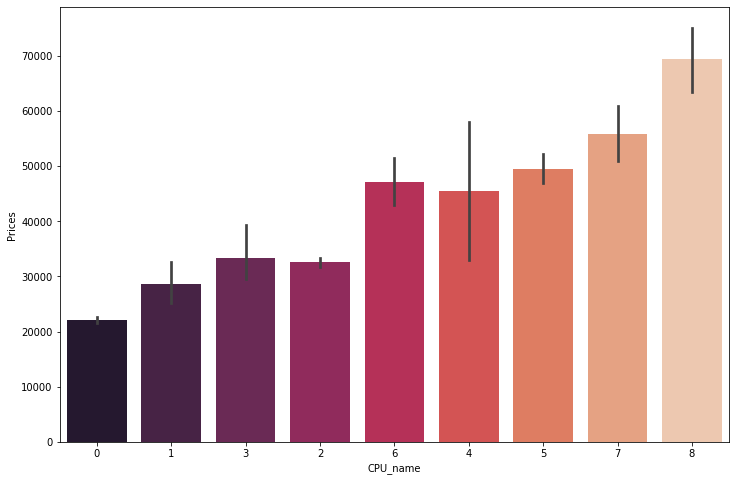

In [ ]:
plt.figure(figsize=(12,8))
result = df.groupby(["CPU_name"])['Prices'].median().reset_index().sort_values('Prices')
sns.barplot(x='CPU_name', y="Prices", data=df, palette='rocket', order=result['CPU_name'])

In [ ]:
df.replace({'CPU_name': {3:2, 2:3, 6:4, 4:5, 5:6}}, inplace=True)

In [ ]:
df.corr()

,Brand,CPU_name,RAM,Prices
Brand,1.000000,0.160284,0.126212,0.400136
CPU_name,0.160284,1.000000,0.420282,0.747751
RAM,0.126212,0.420282,1.000000,0.616769
Prices,0.400136,0.747751,0.616769,1.000000
